# 01.01 - PROYECTO KAGGLE

In [38]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [39]:
!pip install -q kaggle #instalar el paquete de kaggle en el entorno
from google.colab import files #importar libreria para subir archivo .json
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"elianaarroyave","key":"fc00726b4e73cd3cd95db3316640b824"}'}

In [40]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.' #permitir lectura de credenciales
!chmod 600 ./kaggle.json
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


## unzip and inspect data

In [41]:
!unzip house-prices-advanced-regression-techniques.zip > /dev/null #descomprimir archivo

replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
!wc sample_submission.csv

 1460  1460 31939 sample_submission.csv


## load `train.csv` data with pandas



In [43]:
import pandas as pd #importar librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split


z = pd.read_csv("train.csv") #leer el archivo .csv

print ("shape of loaded dataframe", z.shape) #leer filas y columnas


shape of loaded dataframe (1460, 81)


In [44]:
z.head() #mostrar dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
df_test=pd.read_csv('/content/test.csv') #testear datos
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## we will do a model using the next columns

- we have to predict column `SalePrice` using the rest

Usaremos las siguientes columnas
  - `LotFrontage` Calle conectada a la propiedad
  - `LotArea` Tamaño del lote
  - `TotalBsmtSF`Área del sótano
  - `GrLivArea` Área habitable sobre el nivel del suelo
  -  `GarageArea` Tamaño del garaje
  - `PoolArea` Área de la piscina

In [46]:
data_train=z.copy() #creamos una copia para no alterar el dataframe original
data_train[:81]
data_train = z[['LotFrontage', 'LotArea', 'TotalBsmtSF', 'GrLivArea','GarageArea', 'PoolArea', 'SalePrice']]
data_train.head()

,LotFrontage,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,SalePrice
0,65.0,8450,856,1710,548,0,208500
1,80.0,9600,1262,1262,460,0,181500
2,68.0,11250,920,1786,608,0,223500
3,60.0,9550,756,1717,642,0,140000
4,84.0,14260,1145,2198,836,0,250000


Observamos la distribucion de algunas columnas

<Axes: xlabel='LotFrontage'>

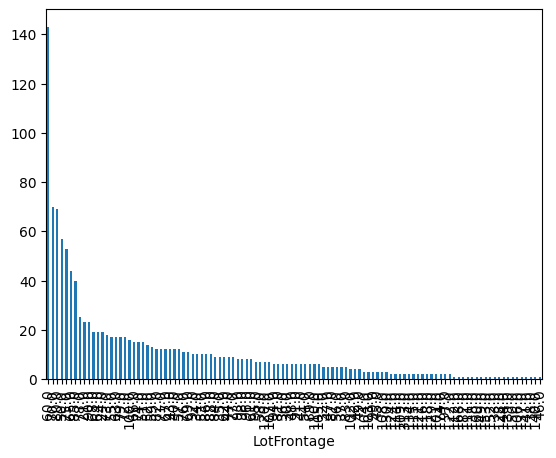

In [47]:
data_train.LotFrontage.value_counts().plot(kind='bar')

<Axes: xlabel='LotArea'>

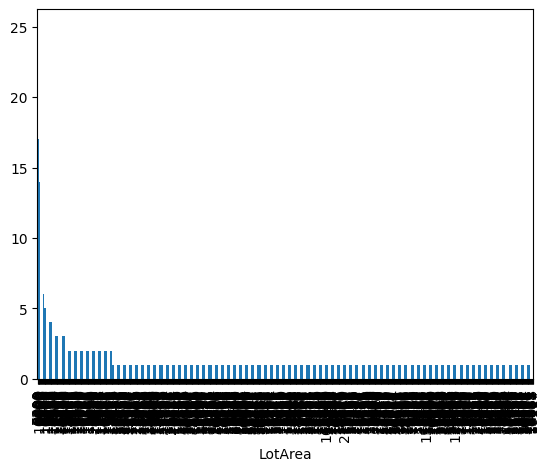

In [48]:
data_train.LotArea.value_counts().plot(kind='bar')

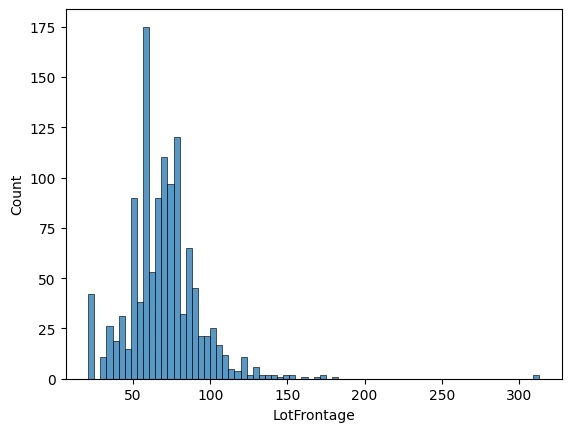

In [49]:
sns.histplot(data_train['LotFrontage']); # variacion de medida frontal lineal

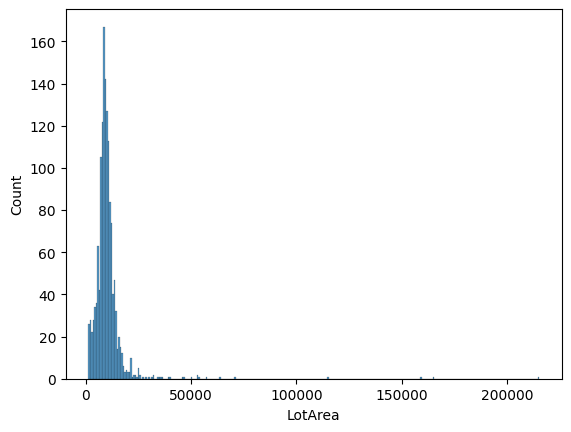

In [50]:
sns.histplot(data_train['LotArea']); # variacion de tamaño de lotes

## Inspect visually if these two columns have distinctive behaviour with respect to what we want to predict

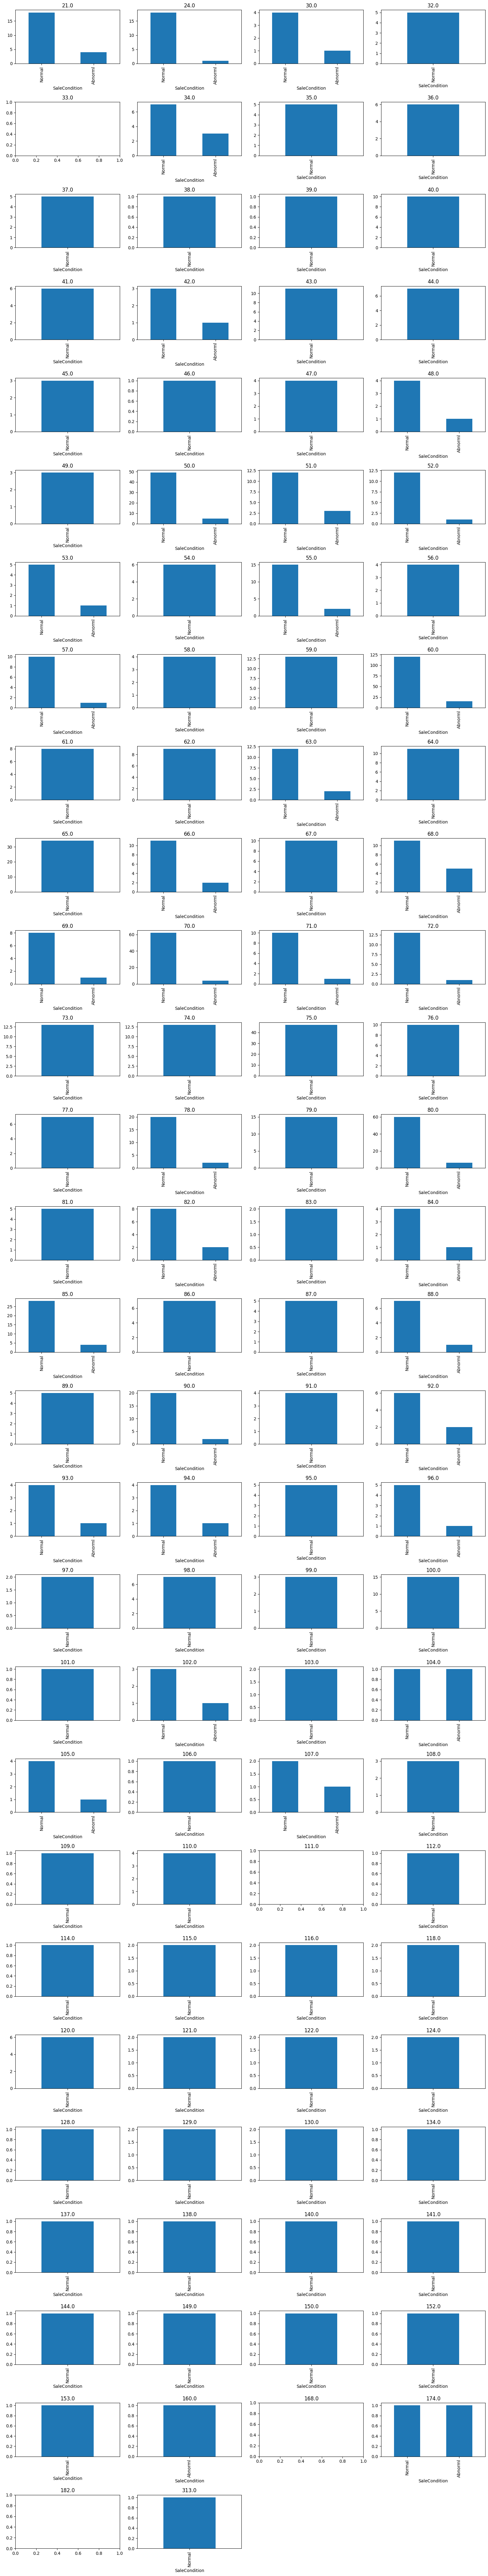

In [51]:
from rlxutils import subplots
import matplotlib.pyplot as plt
#analizar comportamiento de las variables respecto a la prediccion
c = sorted(z.LotFrontage.value_counts().index)
for ax, ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.LotFrontage == ci]
    value_counts = zc.SaleCondition.value_counts()
    # Verificar si 'Normal' y 'Abnorml' están en los índices antes de acceder
    if 'Normal' in value_counts.index and 'Abnorml' in value_counts.index:
        value_counts[['Normal', 'Abnorml']].plot(kind='bar', ax=ax)
    elif 'Normal' in value_counts.index:
        value_counts[['Normal']].plot(kind='bar', ax=ax)
    elif 'Abnorml' in value_counts.index:
        value_counts[['Abnorml']].plot(kind='bar', ax=ax)
    plt.title(ci)
plt.show()

## Basic cleanup
considering that we have in total 1460K data items, observemos missing values on each column

In [52]:
sum(data_train.LotFrontage.isna()), sum(data_train.LotArea.isna()), sum(data_train.TotalBsmtSF.isna()), sum(data_train.GrLivArea.isna()),sum(data_train.GarageArea.isna()), sum(data_train.PoolArea.isna())

(259, 0, 0, 0, 0, 0)

Ahora tenemos 7 columnas de interes

In [53]:
df_train = (data_train)
df_train

,LotFrontage,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,SalePrice
0,65.0,8450,856,1710,548,0,208500
1,80.0,9600,1262,1262,460,0,181500
2,68.0,11250,920,1786,608,0,223500
3,60.0,9550,756,1717,642,0,140000
4,84.0,14260,1145,2198,836,0,250000
...,...,...,...,...,...,...,...
1455,62.0,7917,953,1647,460,0,175000
1456,85.0,13175,1542,2073,500,0,210000
1457,66.0,9042,1152,2340,252,0,266500
1458,68.0,9717,1078,1078,240,0,142125


we will substitute `nan` values with a preset symbol to mark them

In [54]:
data_train.LotFrontage.values[data_train.LotFrontage.isna()] = '0'
data_train.LotArea.values[data_train.LotArea.isna()] = '0'
data_train.TotalBsmtSF.values[data_train.TotalBsmtSF.isna()] = '0'
data_train.GrLivArea.values[data_train.GrLivArea.isna()] = '0'
data_train.GarageArea.values[data_train.GarageArea.isna()] = '0'
data_train.PoolArea.values[data_train.PoolArea.isna()] = '0'
sum(data_train.LotFrontage.isna()), sum(data_train.LotArea.isna()), sum(data_train.TotalBsmtSF.isna()), sum(data_train.GrLivArea.isna()),sum(data_train.GarageArea.isna()), sum(data_train.PoolArea.isna())

(0, 0, 0, 0, 0, 0)

Se busca convertir el data_frame como una representacion de numpy (arrays)

In [55]:
np1= df_train.values
np2 = data_train["LotFrontage"].values
np3 = data_train["LotArea"].values
np4 = data_train["TotalBsmtSF"].values
np5= data_train["GrLivArea"].values
np6 = data_train["GarageArea"].values
np7 = data_train["PoolArea"].values


Se reemplazan los valores '0' por el promedio de la columna

In [56]:
np1[:,6] = np.nan_to_num(np1[:,6], '0'== np.nanmean(np1[:6]))
sum(data_train.LotFrontage.isna()), sum(data_train.LotArea.isna()), sum(data_train.TotalBsmtSF.isna()), sum(data_train.GrLivArea.isna()),sum(data_train.GarageArea.isna()), sum(data_train.PoolArea.isna())

(0, 0, 0, 0, 0, 0)

Se busca conocer el valor maximo y minimo del precio


In [57]:
print("Precio Maximo: "+str(z["SalePrice"].max()))
print("Precio Minimo: "+str(z["SalePrice"].min()))

Precio Maximo: 755000
Precio Minimo: 34900


La funcion 'sns' permite graficar dF, y observar las densidad de los datos

<Axes: xlabel='LotFrontage', ylabel='Count'>

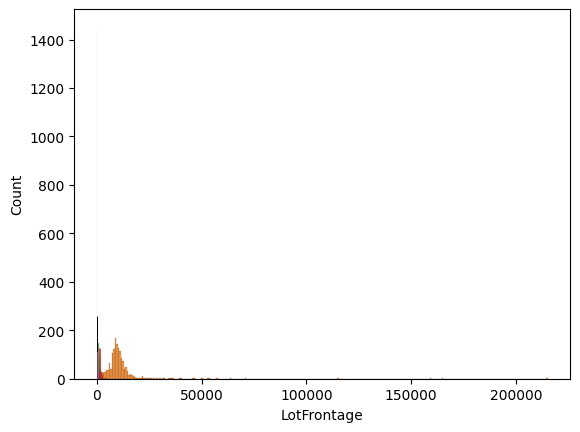

In [58]:
sns.histplot(df_train['LotFrontage'])
sns.histplot(df_train['LotArea'])
sns.histplot(df_train['TotalBsmtSF'])
sns.histplot(df_train['GrLivArea'])
sns.histplot(df_train['GarageArea'])
sns.histplot(df_train['PoolArea'])

De entrenamiento se saca un conjunto de datos que nos serviran para subentrenamiento y subtesteo

In [59]:
np1_train, np1_test, np2_train, np2_test, np3_train, np3_test, np4_train, np4_test, np5_train, np5_test, np6_train, np6_test= train_test_split(np1,np2, np3, np4, np5, np6, test_size=0.3)
print (np1_train.shape, np1_test.shape, np2_train.shape, np2_test.shape, np3_train.shape, np3_test.shape, np4_train.shape, np4_test.shape, np5_train.shape, np5_test.shape,  np6_train.shape, np6_test.shape)

(1022, 7) (438, 7) (1022,) (438,) (1022,) (438,) (1022,) (438,) (1022,) (438,) (1022,) (438,)
